# Medical Text Data Cleaning

**Natural Language Prodigies** | *Phase 4 Project* 

## Data Overview and Problem Description

The goal of this project is to build a classification model for text data.

We found [this dataset](https://www.kaggle.com/datasets/chaitanyakck/medical-text?select=train.dat) on kaggle, which has the following description provided:

`Medical abstracts describe the current conditions of a patient. Doctors routinely scan dozens or hundreds of abstracts each day as they do their rounds in a hospital and must quickly pick up on the salient information pointing to the patient’s malady. You are trying to design assistive technology that can identify, with high precision, the class of problems described in the abstract. In the given dataset, abstracts from 5 different conditions have been included: digestive system diseases, cardiovascular diseases, neoplasms, nervous system diseases, and general pathological conditions.`

`The training dataset consists of 14438 records and the test dataset consists of 14442 records. The train data has classes whereas, the test data classes are needed to be predicted.`

In this notebook, we clean this data using NLP pre-processing techniques and export the end product as a dataframe.

## Imports

In [1]:
import pandas as pd
import numpy as np

# ntlk stuff
import nltk
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# for eda vizzies
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

We had to get a little creative to properly load up our data. You can see our individual steps below.

In [2]:
# Load up raw data
with open('../data/train.dat', 'r') as file:
    raw_data = file.read()

# Split the data into rows with new line separators
rows = raw_data.split('\n')

# Create dataframe from rows
df = pd.DataFrame(rows, columns=['raw'])

df

,raw
0,4\tCatheterization laboratory events and hospi...
1,5\tRenal abscess in children. Three cases of r...
2,2\tHyperplastic polyps seen at sigmoidoscopy a...
3,5\tSubclavian artery to innominate vein fistul...
4,4\tEffect of local inhibition of gamma-aminobu...
...,...
14434,1\tMammographic measurements before and after ...
14435,1\tUse of leukocyte-depleted platelet concentr...
14436,2\tComplications of Tenckhoff catheters post r...
14437,3\tFatal or severely disabling cerebral infarc...


In [3]:
# Pull out class label from rows
df[['class', 'raw']] = df['raw'].str.split('\t', n=1, expand=True)

# Drop empty row at end
df.drop(14438, axis=0, inplace=True)

# Recast class label as integer
df['class'] = df['class'].astype('int')

df

,raw,class
0,Catheterization laboratory events and hospital...,4
1,Renal abscess in children. Three cases of rena...,5
2,Hyperplastic polyps seen at sigmoidoscopy are ...,2
3,Subclavian artery to innominate vein fistula a...,5
4,Effect of local inhibition of gamma-aminobutyr...,4
...,...,...
14433,Quadricuspid aortic valve and aortic regurgita...,4
14434,Mammographic measurements before and after aug...,1
14435,Use of leukocyte-depleted platelet concentrate...,1
14436,Complications of Tenckhoff catheters post remo...,2


Looks good. Let's get a little EDA going now.

## EDA

In [4]:
df['class'].value_counts()

5    4805
1    3163
4    3051
3    1925
2    1494
Name: class, dtype: int64

So we've got 5 classes. From [this link](https://github.com/sebischair/medical-abstracts-tc-corpus), listed on the kaggle web page as the datasource, our labels correspond to the following classes:

1. neoplasms
2. digestive system diseases
3. nervous system diseases
4. cardiovascular diseases
5. general pathological conditions

Let's do a little sniff test for these.

In [5]:
df.raw[df['class'] == 1].values[0]

'Infection during chronic epidural catheterization: diagnosis and treatment. A potentially serious complication of long-term epidural catheterization in cancer patients is infection. The early signs of infection were studied in 350 patients in whom long-term epidural catheters were inserted. Three areas of the catheter track were found to be involved; exit site and superficial catheter track infection, and epidural space infection. The authors identified the early signs of infection in each area and the progress of the infection from the deep track to include the epidural space in four of these patients. All 19 patients who developed deep track or epidural infections were successfully treated with antibiotics and catheter removal. None of the patients required surgery for spinal cord decompression. Catheters were replaced in 15 of the 19 treated patients who requested them after treatment with no recurrent infections. It was concluded that use of long-term epidural catheterization is a

In [6]:
df.raw[df['class'] == 2].values[0]

"Hyperplastic polyps seen at sigmoidoscopy are markers for additional adenomas seen at colonoscopy. Asymptomatic individuals undergoing screening flexible sigmoidoscopy were prospectively studied. Polyps were found in 185 subjects. The endoscopist recorded an opinion on the polyps' histology based on endoscopic appearance. No polyps were removed at sigmoidoscopy. All subjects with rectosigmoid polyps then underwent colonoscopy and polypectomy. Of them, 99 subjects (54%) had at least one rectosigmoid adenoma, 69 (37%) had only hyperplastic polyps, and 17 (9%) had other findings. The endoscopists' opinion of the histopathology of polyps at sigmoidoscopy was correct for 61% of the lesions. Of subjects with adenomatous rectosigmoid polyps, 29% had additional adenomas at more proximal sites. Proximal adenomas were found in 28% of patients with hyperplastic rectosigmoid polyps. Patients with rectosigmoid hyperplastic polyps had the same risk for additional proximal adenomas as patients with 

In [7]:
df.raw[df['class'] == 3].values[0]

"Multiple representations contribute to body knowledge processing. Evidence from a case of autotopagnosia. Body schema disturbances were studied in a 62-yr-old woman with Alzheimer's disease. She was severely impaired in verbal and nonverbal tasks requiring her to localize body parts (on her own body, the examiner's body or a doll's body) even though she correctly named the same parts when pointed at by the examiner. Pointing responses were misdirected mainly to parts contiguous with the target area and, to a lesser extent, to functionally equivalent body parts. We also found that the patient was able to define body part names functionally but not spatially. In another series of tasks, and in contrast to the above results, performances were normal when small objects, attached to the patient's body, served as pointing targets. Furthermore, on subsequent testing she pointed correctly at the remembered position of these objects. The fact that the same point in 'body space' is localized co

In [8]:
df.raw[df['class'] == 4].values[0]

'Catheterization laboratory events and hospital outcome with direct angioplasty for acute myocardial infarction To assess the safety of direct infarct angioplasty without antecedent thrombolytic therapy, catheterization laboratory and hospital events were assessed in consecutively treated patients with infarctions involving the left anterior descending (n = 100 patients), right (n = 100), and circumflex (n = 50) coronary arteries. The groups of patients were similar for age (left anterior descending coronary artery, 59 years; right coronary artery, 58 years; circumflex coronary artery, 62 years), patients with multivessel disease (left anterior descending coronary artery, 55%; right coronary artery, 55%; circumflex coronary artery, 64%), and patients with initial grade 0/1 antegrade flow (left anterior descending coronary artery, 79%; right coronary artery, 84%; circumflex coronary artery, 90%). Cardiogenic shock was present in eight patients with infarction of the left anterior descen

In [9]:
df.raw[df['class'] == 5].values[0]

'Renal abscess in children. Three cases of renal abscesses in children are described to illustrate the variable presenting features. An additional 23 pediatric cases, reported over the past ten years, were reviewed for clinical features and therapy. Fever, loin pain, and leukocytosis were common presenting features, but less than half of all abscesses were associated with either an abnormal urinalysis or a positive urine culture. The presenting features were sometimes confused with appendicitis, peritonitis, or a Wilms tumor. An organism was identified in 17 cases--Escherichia coli in 9 children and Staphylococcus aureus in 8 children. The majority of E. coli infections occurred in girls and the majority of S. aureus infections occurred in boys. Reflux was documented in 5 patients, and 2 children had a possible extrarenal source of infection. Antibiotics alone produced a cure in 10 children (38%), but 16 children (62%) required a surgical procedure. '

Those labels looks alright to us. Let's visualize the label distribution.

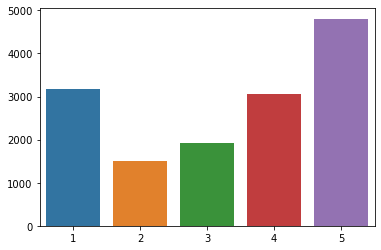

In [10]:
x = df['class'].value_counts().index
y = df['class'].value_counts().values

sns.barplot(x=x, y=y);

Moderately imbalanced. We'll keep that in mind for later.

## Tokenize & Filter

We want to use functions to clean this data to keep our process as transparent as possible, as well as to be able to easily adjust any cleaning steps later if need be for our models.

Our first function will be one that converts our text to lowercase, tokenizes the words (removing punctuation while doing so, and removes stopwords using the NLTK stopwords list.

In [11]:
def tokenize_text(text, tokenizer, stopwords_list):
    # Standardize case (lowercase the text)
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    
    # Return the preprocessed text
    return filtered_tokens

In [12]:
# Defining a RegEx pattern for use in our tokenizer
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# Instantiate the tokenizer and pass the RegEx pattern
tokenizer = RegexpTokenizer(pattern)

# Defining stopwords list from NLTK
stopwords_list = stopwords.words('english')

# Test function
tokenize_text(df.raw.iloc[0], tokenizer, stopwords_list)

['catheterization',
 'laboratory',
 'events',
 'hospital',
 'outcome',
 'direct',
 'angioplasty',
 'acute',
 'myocardial',
 'infarction',
 'assess',
 'safety',
 'direct',
 'infarct',
 'angioplasty',
 'without',
 'antecedent',
 'thrombolytic',
 'therapy',
 'catheterization',
 'laboratory',
 'hospital',
 'events',
 'assessed',
 'consecutively',
 'treated',
 'patients',
 'infarctions',
 'involving',
 'left',
 'anterior',
 'descending',
 'n',
 'patients',
 'right',
 'n',
 'circumflex',
 'n',
 'coronary',
 'arteries',
 'groups',
 'patients',
 'similar',
 'age',
 'left',
 'anterior',
 'descending',
 'coronary',
 'artery',
 'years',
 'right',
 'coronary',
 'artery',
 'years',
 'circumflex',
 'coronary',
 'artery',
 'years',
 'patients',
 'multivessel',
 'disease',
 'left',
 'anterior',
 'descending',
 'coronary',
 'artery',
 'right',
 'coronary',
 'artery',
 'circumflex',
 'coronary',
 'artery',
 'patients',
 'initial',
 'grade',
 'antegrade',
 'flow',
 'left',
 'anterior',
 'descending',
 'c

Looks like it works! We'll apply that function over the whole column to create a new column of tokenized words.

In [13]:
df['tokenized'] = df.raw.apply(lambda x: tokenize_text(x, tokenizer, stopwords_list))

In [14]:
df.head(2)

,raw,class,tokenized
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal..."


Tokenized and ready for stemming or lemming.

## Lemmatize It UP!

Now we want to build a lemmatization function. We like lemmatizing better than stemming because, in general, it gives us more accurate roots. If we had a much larger dataset we might be more worried about the added computing power needed, but not so much here.

In [15]:
# This will translate the Part of Speech tags that WordNetLemmatizer produces 
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# This is the lemmatize function
def lemmatize_with_pos(tokens):
    lemmatizer = WordNetLemmatizer()
    pos_tokens = pos_tag(tokens)
    return [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tokens]

In [16]:
# Apply to entire tokenized row
df['lemmatized'] = df.tokenized.apply(lemmatize_with_pos)

In [17]:
df.head(2)

,raw,class,tokenized,lemmatized
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital...","[catheterization, laboratory, event, hospital,..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal...","[renal, abscess, child, three, case, renal, ab..."


Rolling right along. We are curious about the most frequent words in each class. Let's take a look.

## Remove more words 

In [18]:
# Function that will chart token frequencies for each class
def token_freq(dataframe, column):
    
    for x in range(1,6):
        token_list = []
        for tokens in dataframe[dataframe['class'] == x][column].values:
            token_list.extend(tokens)
            
        fdist = FreqDist(token_list)
        plt.figure(figsize=(12, 2))
        print(f'Class {x}')
        fdist.plot(30);

Class 1


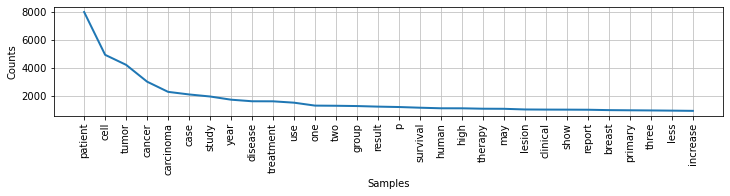

Class 2


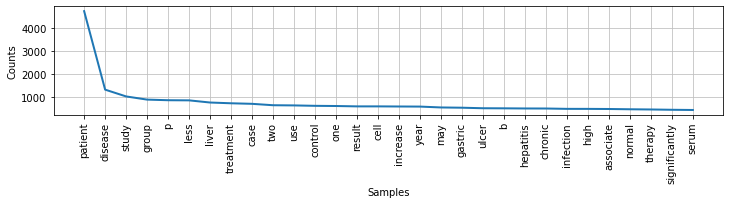

Class 3


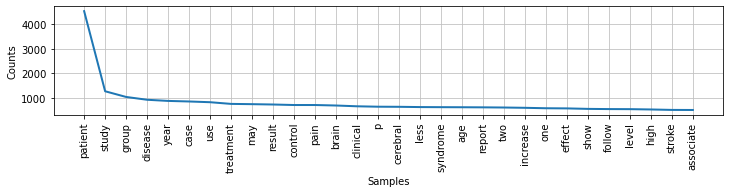

Class 4


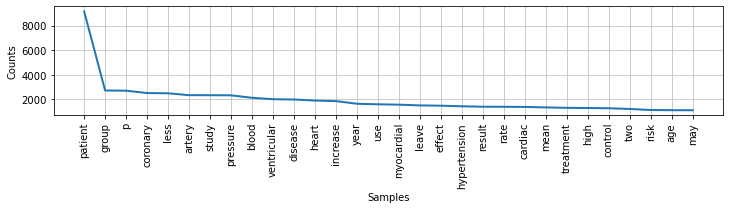

Class 5


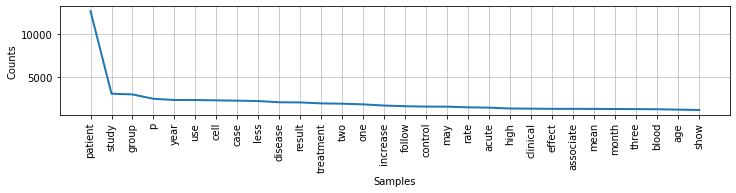

In [19]:
token_freq(df, 'lemmatized')

Looks like we've got some words appearing in each class. Our model would probably benefit by removing this noise. Just by eyeballing these charts, we have decided to remove the following words: **patient, study, group, year, use, less, case, treatment, p, n, one, two, disease**

Now let's remove these words and look at the distribution again.

In [20]:
def remove_common_words(tokens, words_list):
    
    # Remove common words using `words_list`
    filtered_tokens = [word for word in tokens if word not in words_list]
    
    # Return the cleaned tokens
    return filtered_tokens

In [21]:
# List of words to remove
words_list = ['patient', 'study', 'group', 'year', 'use',\
              'less', 'case', 'treatment', 'p', 'n', 'one',\
              'two', 'disease']

# Create new 'cleaned' column
df['cleaned'] = df.lemmatized.apply(lambda x: remove_common_words(x, words_list))

Class 1


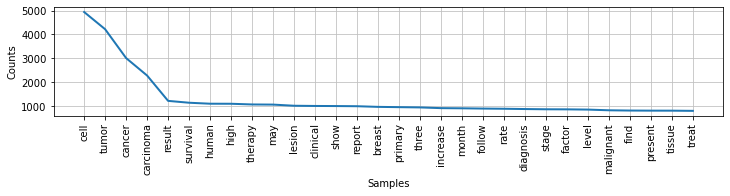

Class 2


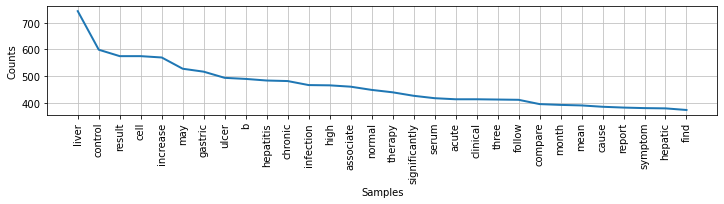

Class 3


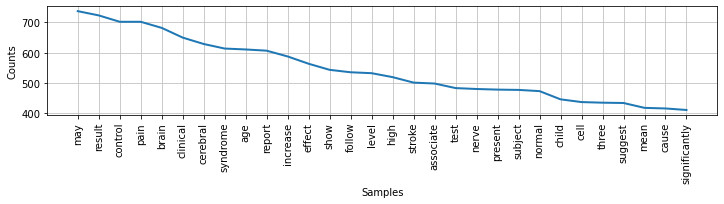

Class 4


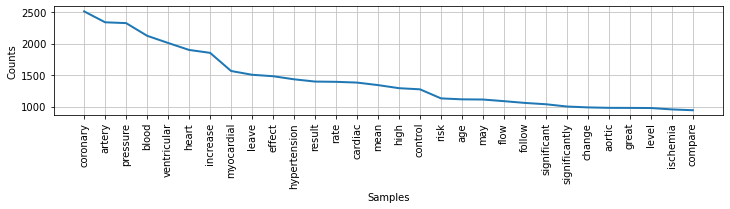

Class 5


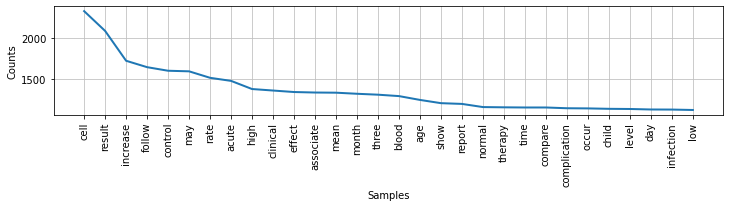

In [22]:
token_freq(df, 'cleaned')

Sweet! We are happy with this data for our first simple model. Let's save this down into a new dataframe for later use.

## Finalize cleaned dataframe and save down

In [23]:
df.head(2)

,raw,class,tokenized,lemmatized,cleaned
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital...","[catheterization, laboratory, event, hospital,...","[catheterization, laboratory, event, hospital,..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal...","[renal, abscess, child, three, case, renal, ab...","[renal, abscess, child, three, renal, abscess,..."


In [24]:
final_df = df[['cleaned', 'class']]
final_df.head(2)

,cleaned,class
0,"[catheterization, laboratory, event, hospital,...",4
1,"[renal, abscess, child, three, renal, abscess,...",5


In [25]:
final_df.to_csv('../data/train_cleaned.csv')